In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importação dos dados do Fortran

In [12]:
df = pd.read_csv('./periodos.csv', sep=',', header=0)
df.head()

,theta,periodo
0,1.570796,7.41
1,1.562942,7.40
2,1.555088,7.38
3,1.547234,7.37
4,1.539380,7.36


# Gráfico de $T(\theta_0)$

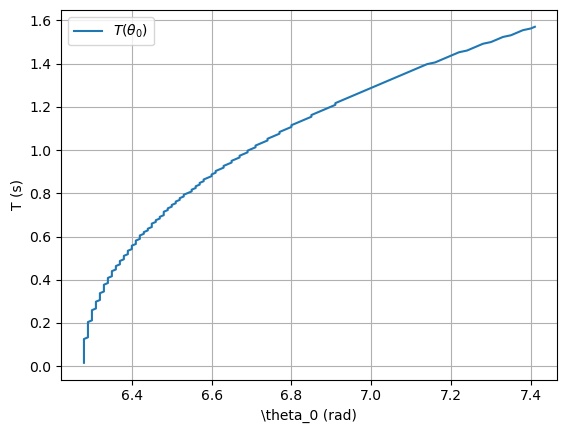

In [14]:
f1, ax1 = plt.subplots()
ax1.plot(df['periodo'], df['theta'], label='$T(\\theta_0)$')
ax1.set_xlabel('\\theta_0 (rad)')
ax1.set_ylabel('T (s)')
ax1.grid()
ax1.legend()